# Project 2: Predicting House Prices with Linear Regression (Part 1 of 3)


> By:  Rohazeanti Mohamad Jenpire

### Problem Statement:

Real estate agents or brokers utilize Comparative Market Analysis, [*CMA*](https://www.investopedia.com/terms/c/comparative-market-analysis.asp), to present clients with a proposed sale price and a comprehensive justification for the price. It is an estimate of a home's value based on recently sold, similar properties in the immediate area. 


Even with such analytics tool available, many brokers applied personal experience and intuition when presenting proposed price to home buyers. Our analysis aims to create a regression model for pricing homes closer to their "real value" in the Ames, Iowa housing market. There are various websites that such as [*Zillow.com*](https://www.zillow.com/) and [*Trulia.com*](https://www.trulia.com/) that provide estimates on the market value of a particular property.

Our analysis will build a model specifically for Ames, Iowa, that real estate brokers can utilize on top of CMA reports to me more confident in their proposed price with an objective of predicting the price of housing in Ames,  with higher accuracy and more features.

### Executive Summary
This project explores Ames Dataset which contains contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010. The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables 

Exploratory data analysis revealed a seemingly strong positive correlation between the Sale Price and Overall Quality and size of Ground Living Area amongst many others. Exploratory data analysis also revealed that there is a strong negative correlation between Sale Price and age of the house which is expected. Older houses tend to be have lower overall quality and condition which affects price. 

Our data model is able to predict price of house with features such as location in a neighborhood, overall quality of the house, presence of fireplace and its quality as and even based on the when the house was last remodeled. 

## Table of Contents
- [Imports](#Imports)
- [Read Data](#Read-Data)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Pre-processing](#Pre-processing)
- [Modelling](#Modelling)
- [Inferential Visualizations](#Inferential-Visualizations)
- [Business Recommendations](#Business-Recommendations)

## Imports

In [331]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
import missingno as msno
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from math import sqrt, ceil
from itertools import zip_longest
pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})

pd.pandas.set_option('display.max_columns', None)

## Read Data

In [332]:
#read training data
train = pd.read_csv('datasets/train.csv')

In [333]:
#print first first 5 row of train data
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [334]:
#determine number of rows and columns in train dataset
train.shape

(2051, 81)

### Inspect Data

In [335]:
#store numerical columns
numerical_cols = [col for col in train.columns if train.dtypes[col] != 'object']

print("There are",len(numerical_cols),"numerical columns")

There are 39 numerical columns


In [336]:
#print numerical columns info
train[numerical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Overall Qual     2051 non-null   int64  
 6   Overall Cond     2051 non-null   int64  
 7   Year Built       2051 non-null   int64  
 8   Year Remod/Add   2051 non-null   int64  
 9   Mas Vnr Area     2029 non-null   float64
 10  BsmtFin SF 1     2050 non-null   float64
 11  BsmtFin SF 2     2050 non-null   float64
 12  Bsmt Unf SF      2050 non-null   float64
 13  Total Bsmt SF    2050 non-null   float64
 14  1st Flr SF       2051 non-null   int64  
 15  2nd Flr SF       2051 non-null   int64  
 16  Low Qual Fin SF  2051 non-null   int64  
 17  Gr Liv Area   

In [337]:
categorical_cols = [col for col in train.columns if train.dtypes[col] == 'object']
print("There are",len(categorical_cols),"categorical columns")

There are 42 categorical columns


In [338]:
#print categorical columns info
train[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2051 non-null   object
 1   Street          2051 non-null   object
 2   Alley           140 non-null    object
 3   Lot Shape       2051 non-null   object
 4   Land Contour    2051 non-null   object
 5   Utilities       2051 non-null   object
 6   Lot Config      2051 non-null   object
 7   Land Slope      2051 non-null   object
 8   Neighborhood    2051 non-null   object
 9   Condition 1     2051 non-null   object
 10  Condition 2     2051 non-null   object
 11  Bldg Type       2051 non-null   object
 12  House Style     2051 non-null   object
 13  Roof Style      2051 non-null   object
 14  Roof Matl       2051 non-null   object
 15  Exterior 1st    2051 non-null   object
 16  Exterior 2nd    2051 non-null   object
 17  Mas Vnr Type    2029 non-null   object
 18  Exter Qu

### Describe train data

In [339]:
#view description of numerical features
train[numerical_cols].describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [340]:
#view description of categorical features
train[categorical_cols].describe(include = "all").T

,count,unique,top,freq
MS Zoning,2051,7,RL,1598
Street,2051,2,Pave,2044
Alley,140,2,Grvl,85
Lot Shape,2051,4,Reg,1295
Land Contour,2051,4,Lvl,1843
Utilities,2051,3,AllPub,2049
Lot Config,2051,5,Inside,1503
Land Slope,2051,3,Gtl,1953
Neighborhood,2051,28,NAmes,310
Condition 1,2051,9,Norm,1767


**Comments:**

After going through the data dictionary for this dataset, I observed that there are a variety of data types which includes ordinal, nominal, discrete and continuous variables. 

There are also several columns that are related to one another such as Lot, Garage, Basement, Mas Vnr. 

- All the data types for both numerical and categorical columns are correct for their representative data. 

- `Id` & `PID` feature may be removed as it is a column consisting of unique value representing each row/house. It clearly does not have a relationship to the target variable `SalePrice`. Before we drop the column, I will check for duplicate rows through the `Id`.  

- The frequency of some **categorical features** class are very high. For such skewed features, it may not be very meaningful to keep. As such, I will consider dropping it.:

    -`Heating`, GasA class has a frequency of 2018 out of 2051 possible rows.  
    
    -`Street`, Pave class has a frequency of 2044 out of 2051 possible rows.
    
    -`Utilities`, AllPub class has a frequency of 2049 out of 2051 possible rows.
    
    -`Condition 2`, Norm has a frequency of 2025 out of 2051 possible rows.
    
    -`Roof Matl`, CompShg has a frequency of 2025 out of 2051 possible rows.
    

- `Garage Yr Blt` has max value of 2207 which clearly is an error as this dataset is only up to 2010! 

- There are no negative value found in all the features. 

- The count of data for some features are inconsistent which infer that there are missing values. I will inspect these rows closely.

## Data Cleaning

#### Cleaning Functions

In [341]:
#function to store missing columns in list
def show_missing_columns(df):
    #create empty list
    missing_cols = []
    #iterate each column in dataframe
    for cols in df.columns:
        #if there is a missing value in iterated column
        if df[cols].isnull().sum() > 0:
            #append the column with missing value in the list
            missing_cols.append(cols)
    return missing_cols

In [342]:
def missing_columns(df):
    mis_col = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent_missing = round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)[round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False) !=0]
    data_types = df.dtypes.sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    result = pd.concat([mis_col,percent_missing,data_types], axis = 1, keys = ['Total Null Values','% Null Values','Data Types'])
    return result

In [343]:
#function for replace missing columns
def replace_missing_columns(df, col_name):
    for col in col_name:
        if df[col].dtypes == 'object':
            df[col].fillna('None', inplace = True)
        elif df[col].dtypes == 'float64': 
            df[col].fillna(0, inplace = True)
    return missing_columns(train[col_name])

In [344]:
#FINAL drop columns
def drop_columns(df, columns):
    df.drop(columns, axis = 1, inplace = True)

In [345]:
#create an empty list to store columns that I will be dropping
col_to_drop = []
def add_drop_cols(column):
    col_to_drop.append(column)
    return col_to_drop

In [346]:
#final check zero and none 
def check_zero_none(df_col, df):
    for i in df_col:
        if df[i].dtypes == 'object':
            count = (df[i] == 'None').sum()
        elif df[i].dtypes != 'object':
            count = (df[i] == 0).sum()
        print('Count of Zeros/None in',i,':', count)

---
#### Check for duplicates


In [347]:
train[train[['Id']].duplicated()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


Comments:
- There are no duplicates found. 

#### Overview of missing data (Bar plot)

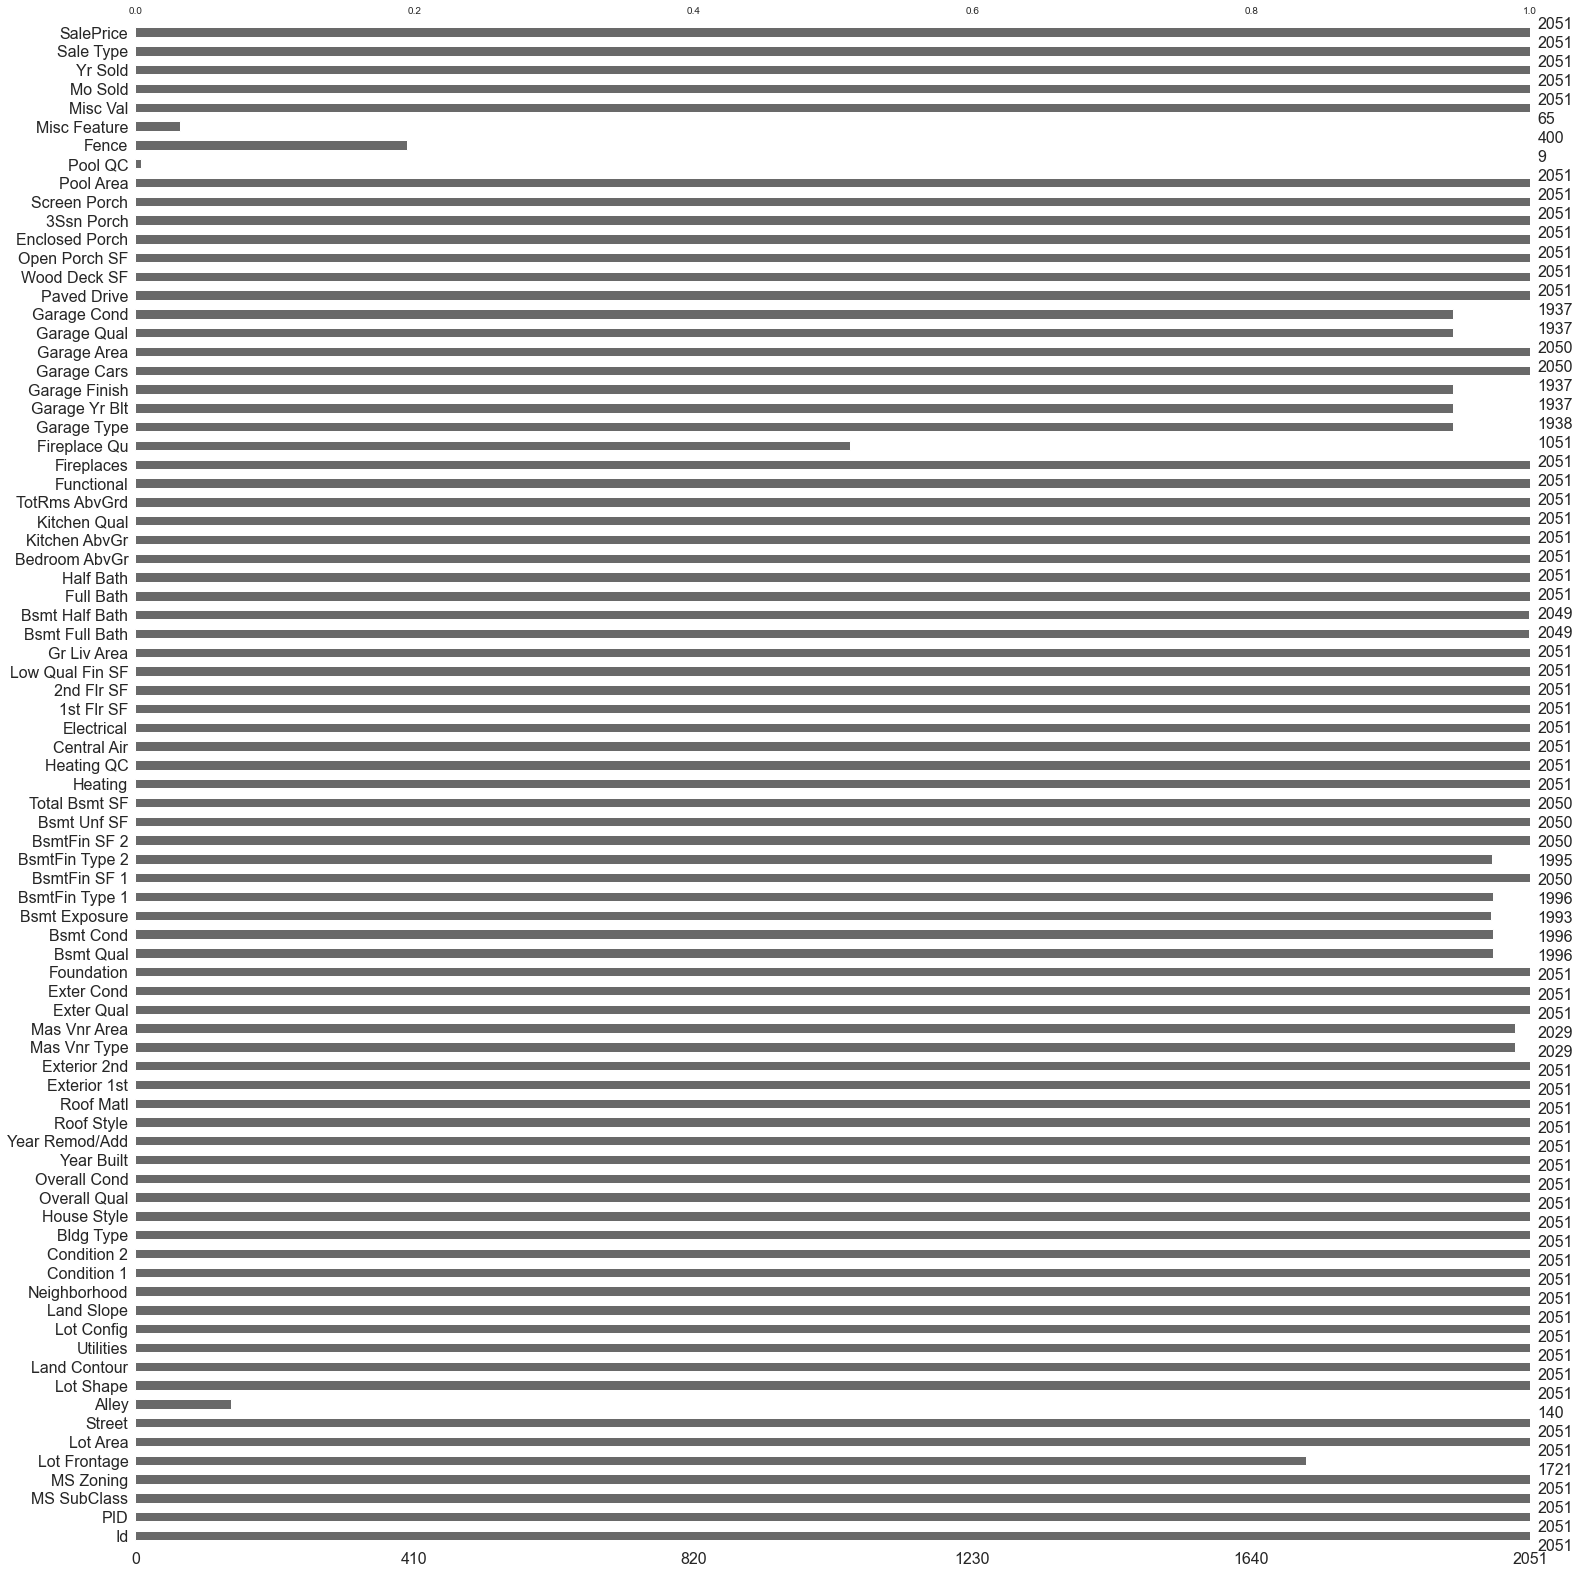

In [348]:
msno.bar(train);

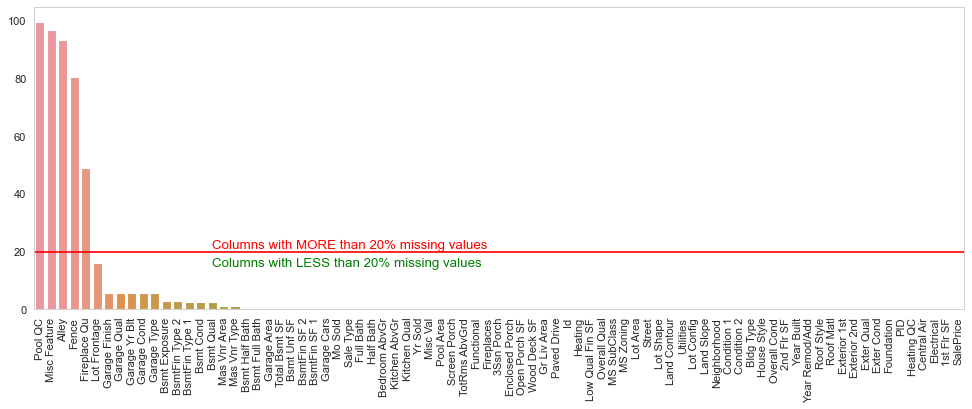

In [349]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})
plt.figure(figsize=(15,5), dpi = 80)
plt.xticks(rotation = 90)
#Drawing a horizontal line at point 2.0
plt.axhline(20, color = 'red')
plt.text(15, 21,'Columns with MORE than 20% missing values', fontsize=12, color = 'red')
plt.text(15, 15,'Columns with LESS than 20% missing values', fontsize=12, color = 'green')
sns.barplot(data = missing_value_df, x = train.columns, y = percent_missing,
            order=missing_value_df.sort_values('percent_missing', ascending = False).column_name);

#### Count Null Values
I want to look at how many null values there is in the **train set** and decide if I want to keep or drop especially those with large number of missing value. 

In [350]:
#show counts of missing values - Train set
missing_columns(train)

,Total Null Values,% Null Values,Data Types
Pool QC,2042,99.56,object
Misc Feature,1986,96.83,object
Alley,1911,93.17,object
Fence,1651,80.50,object
Fireplace Qu,1000,48.76,object
Lot Frontage,330,16.09,float64
Garage Finish,114,5.56,object
Garage Cond,114,5.56,object
Garage Qual,114,5.56,object
Garage Yr Blt,114,5.56,float64


**Comments:** 

- There are 5 features with more than 20% missing data which I will highly likely drop.   
- Most features are missing not at random. The data is "missing" as the house does not have that particular feature. For such cases, I will replace with 0 or None depending on their data type. 
- `Lot Frontage` is a numerical data which has missing data at random. For this feature, I will replace the missing value using mean of `Lot Frontage` groupby Neighborhood as I assume that houses in a neighborhood are usually similar.
- After consulting the data dictionary, I also discovered that there are features that are related to one another. So when I do data cleaning later on, I can check against the related column. 

|Related Columns|
|---|
|`Mas Vnr Type`, `Mas Vnr Area`|
|`Bsmt Qual`,`Bsmt Cond`,`Bsmt Exposure`|
|`BsmtFin Type 1`,`BsmtFin SF 1`,`BsmtFin Type 1`|
|`BsmtFin Type 2'`,`BsmtFin SF 2`,`BsmtFin Type 2`|
|`Bsmt Unf SF`,`Total Bsmt SF`|
|`Bsmt Full Bath`,`Bsmt Half Bath`|
|`Garage Type`,`Garage Yr Blt`,`Garage Finish`,`Garage Cars`,`Garage Qual`,`Garage Cond`|
|`Fireplace Qu`,`Fireplaces`|
|`Heating`, `Heating QC`|
|`Lot Frontage`, `Lot Area`, `Lot Shape`, `Lot Config`|

#### Clean Lot related variables
The variables related to lot are `Lot Frontage`, `Lot Area`, `Lot Shape`, `Lot Config`. There are 330 null values for `Lot Frontage`. As there are no data that indicates non-existent of a lot feature, I impute the null value with its mean according to its `Neighborhood`. 

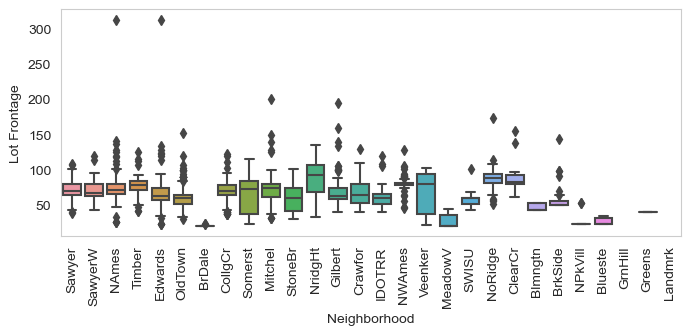

In [351]:
plt.figure(figsize = (8, 3), dpi = 100)
sns.boxplot(x = "Neighborhood", y = "Lot Frontage", data = train)
plt.xticks(rotation = 90)
plt.show()

In [352]:
train.groupby(['Neighborhood'])[['Lot Frontage', 'Lot Area']].mean()

,Lot Frontage,Lot Area
Neighborhood,,
Blmngtn,47.250000,3396.818182
Blueste,27.666667,2409.666667
BrDale,21.315789,1798.105263
BrkSide,56.357143,7017.394737
ClearCr,92.500000,28538.148148
CollgCr,70.753247,10227.283333
Crawfor,69.272727,11667.732394
Edwards,66.930233,10463.671329
Gilbert,72.025641,11143.068966


In [353]:
#imput missing value for Lot Frontage with median
train['Lot Frontage']  = train.groupby(['Neighborhood'])[['Lot Frontage']].transform(lambda x: x.fillna(x.mean()))

In [354]:
train['Lot Frontage'].isnull().sum()

3

There are three more missing values which I am going to replace with median value of the column.

In [355]:
#imput missing value for Lot Frontage with median
train['Lot Frontage']  = train['Lot Frontage'].fillna(train['Lot Frontage'].mean())

In [356]:
train['Lot Frontage'].isnull().sum()

0

In [357]:
train[(train['Lot Frontage'].isnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


#### Clean Garage related variables

In [358]:
#create new df with garage related variables 
garage = ["Garage Cond", "Garage Qual", "Garage Yr Blt", "Garage Finish", "Garage Type", "Garage Area", "Garage Cars"]

In [359]:
missing_columns(train[garage])

,Total Null Values,% Null Values,Data Types
Garage Finish,114,5.56,object
Garage Yr Blt,114,5.56,float64
Garage Qual,114,5.56,object
Garage Cond,114,5.56,object
Garage Type,113,5.51,object
Garage Cars,1,0.05,float64
Garage Area,1,0.05,float64


- As I expect all values related to Garage to be NaN or 0 if the house has no garage feature, so I want to confirm that there are at least 113 records of `Garage Area` and `Garage Cars` where value is 0.

In [360]:
#check values `Garage Area` and `Garage Cars` 
check_garage = train[(train["Garage Cond"].isnull()) &(train["Garage Area"] <1) | (train["Garage Cars"]<1)] 
check_garage#[garage]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
28,2243,911103060,190,C (all),75.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,133,0,0,0,NaN,NaN,NaN,0,6,2007,WD,119600
53,330,923226250,160,RM,21.0,1476,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,200,26,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,76000
65,2278,923202134,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,30,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,147000
79,2235,910201050,50,RM,50.0,7288,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,176,0,0,NaN,NaN,NaN,0,9,2007,WD,129850
101,2084,905476170,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,144,0,0,0,NaN,NaN,NaN,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,325,923204150,90,RL,94.0,9400,Pave,NaN,Reg,Low,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Duplex,2Story,6,5,1971,1971,Mansard,CompShg,MetalSd,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0.0,Unf,0.0,912.0,912.0,GasA,TA,Y,SBrkr,912,912,0,1824,0.0,0.0,2,2,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,128,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,139000
2010,2880,911175410,30,C (all),69.0,12366,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,TA,5,Mod,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,23,0,0,0,NaN,NaN,NaN,0,10,2006,WD,51689
2027,2628,535456010,90,RL,75.0,8512,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1960,1960,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1556.0,1556.0,GasA,TA,Y,SBrkr,1556,0,0,1556,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,119000
2039,22

**Comments:**

- It is observed here that `Garage Area` and `Garage Cars` have 0.0 value instead of NaN. This  explains the inconsistent null values for garage related variables.

- Next I will view the row where `Garage Area` and `Garage Cars` are both null, and ensure that the rest of the garage related variables are also NaN or 0. 

In [361]:
#check null row for `Garage Area` and `Garage Cars` 
check_garage = train[(train["Garage Area"].isnull()) | (train["Garage Cars"].isnull())] 
check_garage[garage]

,Garage Cond,Garage Qual,Garage Yr Blt,Garage Finish,Garage Type,Garage Area,Garage Cars
1712,NaN,NaN,NaN,NaN,Detchd,NaN,NaN


**Comments:**
- All garage related columns are NaN except for `Garage Type` which explains the inconsistent number of missing of 114, instead of 113. The value input for the said columns is incorrect. As such, I will replace the `Detchd` with NaN.

- The above also accounts for one NaN row for `Garage Area` and `Garage Cars` which will be replaced with 0.

In [362]:
train['Garage Type'].isnull().sum()

113

In [363]:
#replace incorrect value with NaN
train.loc[[1712], 'Garage Type'] = np.nan

In [364]:
train['Garage Type'].isnull().sum()

114

In [365]:
missing_columns(train[garage])

,Total Null Values,% Null Values,Data Types
Garage Type,114,5.56,object
Garage Finish,114,5.56,object
Garage Yr Blt,114,5.56,float64
Garage Qual,114,5.56,object
Garage Cond,114,5.56,object
Garage Cars,1,0.05,float64
Garage Area,1,0.05,float64


In [366]:
replace_missing_columns(train, garage)

,Total Null Values,% Null Values,Data Types


In [367]:
check_zero_none(train[garage], train)

Count of Zeros/None in Garage Cond : 114
Count of Zeros/None in Garage Qual : 114
Count of Zeros/None in Garage Yr Blt : 114
Count of Zeros/None in Garage Finish : 114
Count of Zeros/None in Garage Type : 114
Count of Zeros/None in Garage Area : 114
Count of Zeros/None in Garage Cars : 114


In [368]:
#Validation check
validation_check = train[(train['Garage Cond'] == 'None') & (train['Garage Qual'] == 'None') &
      (train['Garage Yr Blt'] == 0) & (train['Garage Finish'] == 'None') &
      (train['Garage Type'] == 'None') & (train['Garage Area'] == 0) &
      (train['Garage Area'] == 0)]

validation_check.shape

(114, 81)

In [369]:
train[garage].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Garage Cond    2051 non-null   object 
 1   Garage Qual    2051 non-null   object 
 2   Garage Yr Blt  2051 non-null   float64
 3   Garage Finish  2051 non-null   object 
 4   Garage Type    2051 non-null   object 
 5   Garage Area    2051 non-null   float64
 6   Garage Cars    2051 non-null   float64
dtypes: float64(3), object(4)
memory usage: 112.3+ KB


**Comments:**

- Earlier we note that `Garage Yr Blt` has max value of 2207 which does not make sense as this dataset is only up to 2010. So we will inspect the row. 

In [370]:
#print column that has Garage built after 2010
check_garage = train[(train['Garage Yr Blt']) >2010]  
check_garage[garage]

,Garage Cond,Garage Qual,Garage Yr Blt,Garage Finish,Garage Type,Garage Area,Garage Cars
1699,TA,TA,2207.0,RFn,Attchd,502.0,2.0


In [371]:
train.loc[[1699], ['Garage Yr Blt','Yr Sold']]

,Garage Yr Blt,Yr Sold
1699,2207.0,2007


**Comments:**
- I believe that `Garage Yr Blt` data was a typographical error. Since the house was sold in 2007, I will replace the value as 2007.

In [372]:
#replace typographical error
train.loc[[1699], ['Garage Yr Blt']] = 2007

In [373]:
#check column has been replace correctly
train.loc[[1699], ['Garage Yr Blt','Yr Sold']]

,Garage Yr Blt,Yr Sold
1699,2007.0,2007


#### Check Basement related variables

In [374]:
#create basement related features
basement = ["Bsmt Qual", "Bsmt Cond", "Bsmt Exposure",
                  "BsmtFin Type 1", "BsmtFin SF 1", "BsmtFin Type 2",
                  "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF", "Bsmt Half Bath", "Bsmt Full Bath"]

In [375]:
missing_columns(train[basement])

,Total Null Values,% Null Values,Data Types
Bsmt Exposure,58,2.83,object
BsmtFin Type 2,56,2.73,object
BsmtFin Type 1,55,2.68,object
Bsmt Cond,55,2.68,object
Bsmt Qual,55,2.68,object
Bsmt Full Bath,2,0.10,float64
Bsmt Half Bath,2,0.10,float64
Total Bsmt SF,1,0.05,float64
Bsmt Unf SF,1,0.05,float64
BsmtFin SF 2,1,0.05,float64


**Comments:**
- When a house does not have a basement, these variables: `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure` should reflect as No Basement or NaN.  

In [376]:
#print rows where `Bsmt Exposure` is NaN while other basement related columns are not null
check_basement = train[(train["Bsmt Exposure"].isnull()) &
                       (train['BsmtFin Type 1'].notnull()) &
                       (train['BsmtFin Type 2'].notnull())]
check_basement[basement]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Half Bath,Bsmt Full Bath
1456,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
1547,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
1997,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0


As observed above, the `Bsmt Exposure` is reflected as NaN which is incorrect. As there are only 3 of such row(least likely to affect prediction), I will reflect it as "No Exposure". 

In [377]:
#check null sum value for `Bsmt Exposure`
train['Bsmt Exposure'].isnull().sum()

58

In [378]:
#replace NaN with No
train.loc[(train["Bsmt Exposure"].isnull()) &
          (train['BsmtFin Type 1'].notnull()) &
          (train['BsmtFin Type 2'].notnull()), 'Bsmt Exposure'] = 'No'

In [379]:
#check null sum value for `Bsmt Exposure`
train['Bsmt Exposure'].isnull().sum()

55

In [380]:
#print all basement feature where 'BsmtFin Type 2' is null
check_basement = train[(train['BsmtFin Type 2'].isnull())]
check_basement[basement]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Half Bath,Bsmt Full Bath
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
240,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
249,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
256,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
390,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
437,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [381]:
check_basement[basement].shape

(56, 11)

**Comments:**
- There are 56 rows which accounts for all the NaN rows for basement related feature. 

- For row index 1147, I will replace the NaN value with 'Unf' for Unfinished as `Bsmt Unf SF` is there is a positive value to its corresponding `Bsmt Unf SF`, and I assume that the basement is unfinished. 

- I observe that most rows except for index 1147 either have NaN or 0.0 value reflected in basement related variables when the house does not have a basement feature. 

- The above also accounts for one NaN rows for `BsmtFin SF 1 `, `BsmtFin SF 2`, `Bsmt Unf SF` `Total Bsmt SF` and 
two NaN rows for `Bsmt Half Bath` and `Bsmt Full Bath`. 

- As such, I will replace all the NaN value with None for object data type or 0 for float data type. 

In [382]:
#check number of missing `BsmtFin Type 2` feature before impute
train['BsmtFin Type 2'].isnull().sum()

56

In [383]:
#replace index 1147 col 'BsmtFin Type 2' with 'Unf'

train.loc[[1147], 'BsmtFin Type 2'] = 'Unf'

In [384]:
#check number of missing `BsmtFin Type 2` feature after impute

train['BsmtFin Type 2'].isnull().sum()

55

In [385]:
missing_columns(train[basement])

,Total Null Values,% Null Values,Data Types
BsmtFin Type 2,55,2.68,object
BsmtFin Type 1,55,2.68,object
Bsmt Exposure,55,2.68,object
Bsmt Cond,55,2.68,object
Bsmt Qual,55,2.68,object
Bsmt Full Bath,2,0.10,float64
Bsmt Half Bath,2,0.10,float64
Total Bsmt SF,1,0.05,float64
Bsmt Unf SF,1,0.05,float64
BsmtFin SF 2,1,0.05,float64


In [386]:
replace_missing_columns(train, basement)

,Total Null Values,% Null Values,Data Types


In [387]:
check_zero_none(train[basement], train)

Count of Zeros/None in Bsmt Qual : 55
Count of Zeros/None in Bsmt Cond : 55
Count of Zeros/None in Bsmt Exposure : 55
Count of Zeros/None in BsmtFin Type 1 : 55
Count of Zeros/None in BsmtFin SF 1 : 658
Count of Zeros/None in BsmtFin Type 2 : 55
Count of Zeros/None in BsmtFin SF 2 : 1804
Count of Zeros/None in Bsmt Unf SF : 166
Count of Zeros/None in Total Bsmt SF : 55
Count of Zeros/None in Bsmt Half Bath : 1925
Count of Zeros/None in Bsmt Full Bath : 1202


In [388]:
#validation check 
validation_check = train[(train['BsmtFin Type 2'] == 'None') & (train['BsmtFin Type 1'] == 'None') &
      (train['Bsmt Exposure'] == 'None') & (train['Bsmt Cond'] == 'None') &
      (train['Bsmt Full Bath'] == 0) & (train['Bsmt Half Bath'] == 0) &
      (train['Total Bsmt SF'] == 0) & (train['Bsmt Unf SF'] == 0) &
      (train['BsmtFin SF 2'] == 0) & (train['BsmtFin SF 1'] == 0)]

validation_check.shape

(55, 81)

In [389]:
train[basement].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bsmt Qual       2051 non-null   object 
 1   Bsmt Cond       2051 non-null   object 
 2   Bsmt Exposure   2051 non-null   object 
 3   BsmtFin Type 1  2051 non-null   object 
 4   BsmtFin SF 1    2051 non-null   float64
 5   BsmtFin Type 2  2051 non-null   object 
 6   BsmtFin SF 2    2051 non-null   float64
 7   Bsmt Unf SF     2051 non-null   float64
 8   Total Bsmt SF   2051 non-null   float64
 9   Bsmt Half Bath  2051 non-null   float64
 10  Bsmt Full Bath  2051 non-null   float64
dtypes: float64(6), object(5)
memory usage: 176.4+ KB


#### Clean Mas Veneer related variables

There are a total of 22 NaN rows for `Mas Vnr Area`, `Mas Vnr Type`. Before I replace the NaN with its appropriate value, I will check if the NaN occurs on the same row which it should as when the house does not have Mas Vnr feature, both should reflect the same. 

In [390]:
mas_veneer = ['Mas Vnr Area', 'Mas Vnr Type']

In [391]:
#check that when one mas veneer column is 0, the other should be None. 
check_veneer = train[(train["Mas Vnr Area"]<=1) & (train["Mas Vnr Type"]!= 'None') | (train["Mas Vnr Area"]>0) & (train["Mas Vnr Type"]== 'None')]
check_veneer[mas_veneer]

,Mas Vnr Area,Mas Vnr Type
669,0.0,BrkFace
765,1.0,None
810,288.0,None
1136,0.0,BrkFace
1148,1.0,None
1187,0.0,Stone
1684,1.0,None
1832,344.0,None


- We can see here that when `Mas Vnr Area` is 0, the `Mas Vnr Type` is not None when it should be None. Similarly, when `Mas Vnr Area` is more than 0, `Mas Vnr Type` should not reflect as None. So for these 8 rows, I will replace `Mas Vnr Area` with 0, and `Mas Vnr Type` with None. As the number of affected rows are only 8 out of over 2000 rows that we have, it is neglible and least likely to affect my model later. 

In [392]:
print("Number of None: ",len(train[train['Mas Vnr Type'] == 'None']))
print("Expected number of None values after cleaning is expected to be 1221")

Number of None:  1218
Expected number of None values after cleaning is expected to be 1221


In [393]:
#replace `Mas Vnr Type` with None
train.loc[(train["Mas Vnr Area"]<=1) & (train["Mas Vnr Type"]!= 'None'), 'Mas Vnr Type']= 'None' 

In [394]:
print("Number of None: ",len(train[train['Mas Vnr Type'] == 'None']))

Number of None:  1221


In [395]:
print("Number of 0: ",len(train[train['Mas Vnr Area'] == 0]))
print("The expected number of 0 is expected to be 1221")

Number of 0:  1216
The expected number of 0 is expected to be 1221


In [396]:
train.loc[(train["Mas Vnr Area"]>0) & (train["Mas Vnr Type"]== 'None'), "Mas Vnr Area"] = 0

In [397]:
len(train[train['Mas Vnr Area'] == 0])

1221

#### Check NaN values for veneer related variables

In [398]:
missing_columns(train[mas_veneer])

,Total Null Values,% Null Values,Data Types
Mas Vnr Type,22,1.07,object
Mas Vnr Area,22,1.07,float64


In [399]:
check_mas_veneer = train[(train["Mas Vnr Area"].isnull()) | (train["Mas Vnr Type"].isnull())]
check_mas_veneer[mas_veneer].shape

(22, 2)

This confirms that all the NaN are cocnsistent for both columns. As such, I will replace NaN with 0 or None according to its data type. 

In [400]:
replace_missing_columns(train, mas_veneer)

,Total Null Values,% Null Values,Data Types


In [401]:
check_zero_none(train[mas_veneer], train)

Count of Zeros/None in Mas Vnr Area : 1243
Count of Zeros/None in Mas Vnr Type : 1243


In [402]:
validation_check = train[(train["Mas Vnr Area"] == 0) & (train["Mas Vnr Type"]== 'None')]
validation_check.shape

(1243, 81)

In [403]:
train[mas_veneer].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mas Vnr Area  2051 non-null   float64
 1   Mas Vnr Type  2051 non-null   object 
dtypes: float64(1), object(1)
memory usage: 32.2+ KB


### Clean `Pool QC`, `Misc Feature`, `Alley`, `Fence`, `Fireplace Qu`, `Lot Frontage`

After consulting the data dictionary, empty rows refer to houses without these features. I will replace with None

In [404]:
others = ['Fireplace Qu','Pool QC', 'Misc Feature', 'Alley', 'Fence']

In [405]:
missing_columns(train)

,Total Null Values,% Null Values,Data Types
Pool QC,2042,99.56,object
Misc Feature,1986,96.83,object
Alley,1911,93.17,object
Fence,1651,80.50,object
Fireplace Qu,1000,48.76,object


In [406]:
replace_missing_columns(train, others)

,Total Null Values,% Null Values,Data Types


In [407]:
show_missing_columns(train)

[]

**Comments:**
No missing values found in our train dataset. 
Now that the Null values have been dealt with, I will look at the count of 'None' and 0 in every feature. My aim is to identify any feature with more than 80% 'None' or 0 and drop those as I feel that such feature is meaningless.

#### Features with more than 80% None or 0 values

In [408]:
def check_zero_none(df):
    print('Count of None or 0:')
    for i in df:
        if df[i].dtypes == 'object':
            count = round(((df[i] == 'None').sum()/len(train) )*100,2)
            if count >80:
                print(i,':', count)
        elif df[i].dtypes != 'object':
            count = round(((df[i] == 0).sum()/len(train))*100,2)
            if count >80:
                print(i,':', count)

In [409]:
check_zero_none(train)

Count of None or 0:
Alley : 93.17
BsmtFin SF 2 : 87.96
Low Qual Fin SF : 98.39
Bsmt Half Bath : 93.86
Enclosed Porch : 84.06
3Ssn Porch : 98.73
Screen Porch : 91.18
Pool Area : 99.56
Pool QC : 99.56
Fence : 80.5
Misc Feature : 96.83
Misc Val : 96.83


In [410]:
cols = ['Alley','BsmtFin SF 2','Low Qual Fin SF','Bsmt Half Bath',
        'Enclosed Porch', '3Ssn Porch', 'Screen Porch','Pool Area',
        'Pool QC','Fence', 'Misc Feature', 'Misc Val']
for i in cols:
    add_drop_cols(i)
    
print(col_to_drop)

['Alley', 'BsmtFin SF 2', 'Low Qual Fin SF', 'Bsmt Half Bath', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val']


### Outliers


In [411]:
def find_outliers(col):
    upper = train.SalePrice[(train[col] > np.mean(train[col]) + 3*np.std(train[col]))].count()
    lower = train.SalePrice[(train[col] < np.mean(train[col]) - 3*np.std(train[col]))].count()
    print(col,':', upper,',',lower)

In [412]:
def drop_outliers(col):
    print("Before drop: ",train.shape)
    train.drop(train[(train[col] > np.mean(train[col]) + 3*np.std(train[col]))].index, inplace=True)
    train.drop(train[(train[col] < np.mean(train[col]) - 3*np.std(train[col]))].index, inplace=True)
    print("Afer drop: ",train.shape)

In [413]:
def create_histogram(col):
    plt.figure(figsize=(15,5), dpi = 80)
    sns.histplot(data=train, x=col, kde=True);

columns_to_inspect: ['SalePrice', 'Gr Liv Area', 'Lot Area', 'Lot Frontage', 'Total Bsmt Area']
numerical_cols = numerical_features = train.select_dtypes(include = ['float64', 'int64']).columns
for i in numerical_cols:
    find_outliers(i)

#### Inspect Outliers: `SalePrice`

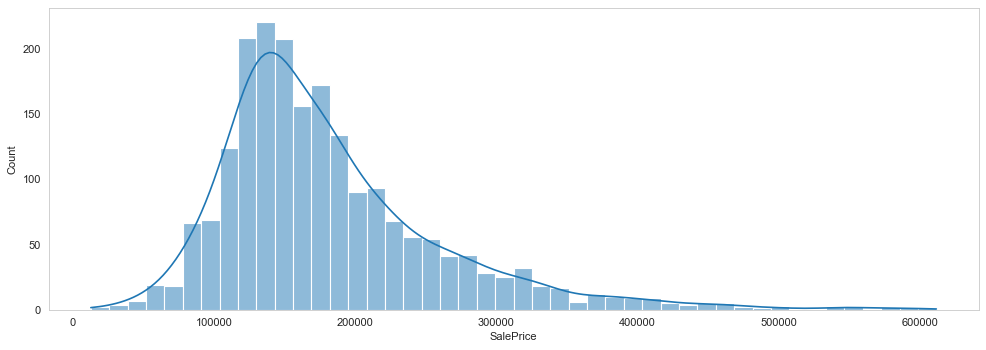

In [414]:
create_histogram('SalePrice')

It obvious that the SalePrice had extreme high values (a long right-tail) and was not distributed normally. This suggested that the data contained a lot of outliers. I need to be cautious when dealing with outliers as I do not want to lose important information. So, I will define outliers under or above 3 standard deviations away from their respective mean values. 

In [415]:
find_outliers('SalePrice')

SalePrice : 33 , 0


In [416]:
drop_outliers('SalePrice')

Before drop:  (2051, 81)
Afer drop:  (2018, 81)


#### Inspect outliers: `Gr Liv Area`

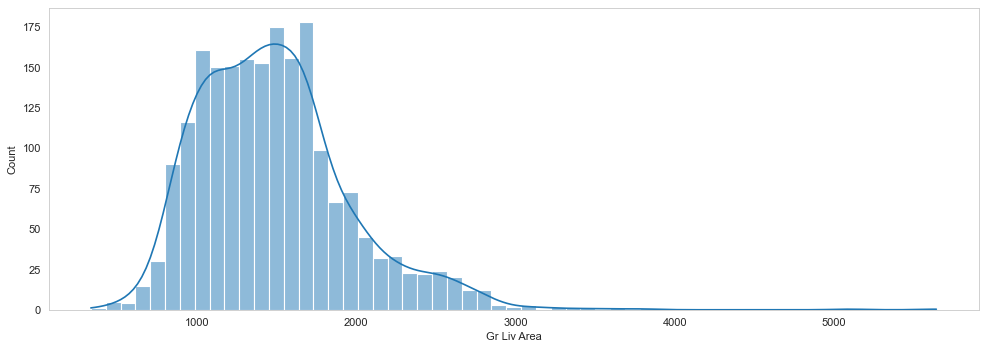

In [417]:
create_histogram('Gr Liv Area')

Similarly, the `Gr Liv Area` had extreme high values (a long right-tail) and was not distributed normally which suggests that the data contained outliers. I will apply the same method in removing outliers.

In [418]:
find_outliers('Gr Liv Area')

Gr Liv Area : 13 , 0


In [419]:
drop_outliers('Gr Liv Area')

Before drop:  (2018, 81)
Afer drop:  (2005, 81)


#### Inspect outliers: `Lot Area`

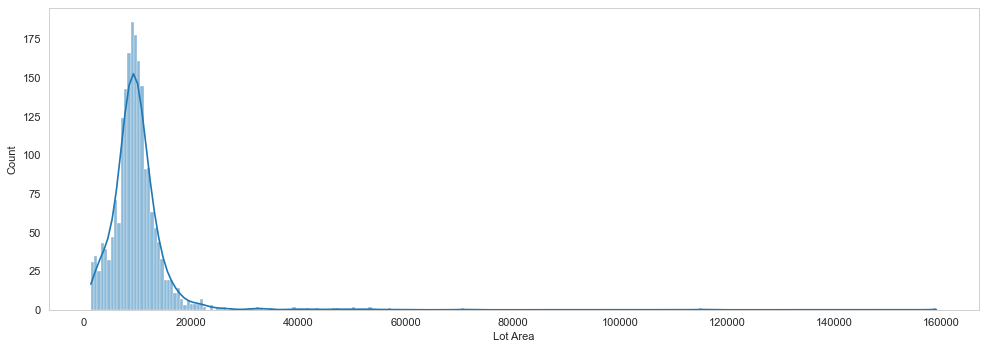

In [420]:
create_histogram('Lot Area')

The `Lot Area` had extreme high values (a long right-tail) and was not distributed normally which suggests that the data contained outliers. I will apply the same method in removing outliers.

In [421]:
find_outliers('Lot Area')

Lot Area : 20 , 0


In [422]:
drop_outliers('Lot Area')

Before drop:  (2005, 81)
Afer drop:  (1985, 81)


#### Inspect outliers: `Lot Frontage`

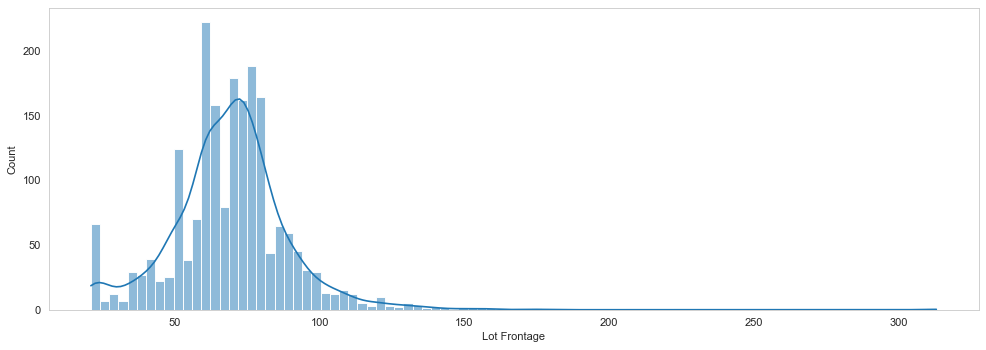

In [423]:
create_histogram('Lot Frontage')

In [424]:
find_outliers('Lot Frontage')

Lot Frontage : 15 , 0


In [425]:
drop_outliers('Lot Frontage')

Before drop:  (1985, 81)
Afer drop:  (1970, 81)


#### Inspect outliers: `Total Bsmt SF`

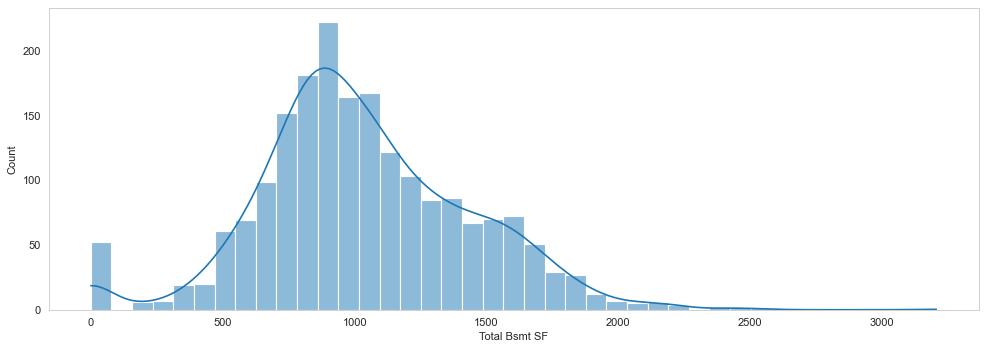

In [426]:
create_histogram('Total Bsmt SF')

In [427]:
find_outliers('Total Bsmt SF')

Total Bsmt SF : 5 , 0


In [428]:
drop_outliers('Total Bsmt SF')

Before drop:  (1970, 81)
Afer drop:  (1965, 81)


In [429]:
print(f"In all we have dropped a total of 53 out of 2051 observations which is {round((53/2051)*100,2)} % of total data")

In all we have dropped a total of 53 out of 2051 observations which is 2.58 % of total data


### Handling Categorical Data: Identifying Cardinality, Rare Categories and Predominant Class

In [430]:
#graph function for high frequency
def high_frequency_chart(df, width, height):
    n_string_features = df.shape[1]
    nrows, ncols = ceil(n_string_features / 3), 3
    
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(width,height))

    for feature_name, ax in zip_longest(df, axs.ravel()):
        if feature_name is None:
            # do not show the axis
            ax.axis("off")
            continue
        label_freq = (train[feature_name].value_counts() / len(train))*100
        label_freq.sort_values(ascending = False).plot.bar(ax=ax)
        ax.set_title(feature_name)
        #ax.axhline(y = 5, color = 'green')
        ax.axhline(y = 90, color = 'red') #
        ax.set_ylabel("Percentage of class")
        ax.set_xlabel('Variable: class')
        #ax.set_title(feature_name)
    
    plt.subplots_adjust(hspace=0.2, wspace=0.8)
    plt.tight_layout()

Earlier we have earlier identified that these variables has high frequency of a class.

-`Heating`, GasA class has a frequency of 2018 out of 2051 possible rows. 

-`Street`, Pave class has a frequency of 2044 out of 2051 possible rows.

-`Utilities`, AllPub class has a frequency of 2049 out of 2051 possible rows.

-`Condition 2`, Norm has a frequency of 2025 out of 2051 possible rows.

-`Roof Matl`, CompShg has a frequency of 2025 out of 2051 possible rows.

We will further inspect the remaining categories.

In [431]:
numerical_cols = train.select_dtypes(include = ['float64', 'int64']).columns
categorical_cols = train.select_dtypes(include = 'object').columns

In [432]:
numerical_data = train.select_dtypes('number')
categorical_data = train.select_dtypes('object')

#### Inspect Categorical Data

In [433]:
for i in categorical_cols:
    print("---",i,"---")
    print(round((train[i].value_counts()/len(train))*100,2))

--- MS Zoning ---
RL         77.25
RM         15.88
FV          5.14
C (all)     0.97
RH          0.66
I (all)     0.05
A (agr)     0.05
Name: MS Zoning, dtype: float64
--- Street ---
Pave    99.69
Grvl     0.31
Name: Street, dtype: float64
--- Alley ---
None    92.98
Grvl     4.27
Pave     2.75
Name: Alley, dtype: float64
--- Lot Shape ---
Reg    64.38
IR1    32.98
IR2     2.34
IR3     0.31
Name: Lot Shape, dtype: float64
--- Land Contour ---
Lvl    90.94
Bnk     3.72
HLS     3.72
Low     1.63
Name: Land Contour, dtype: float64
--- Utilities ---
AllPub    99.90
NoSeWa     0.05
NoSewr     0.05
Name: Utilities, dtype: float64
--- Lot Config ---
Inside     73.84
Corner     16.90
CulDSac     5.80
FR2         3.00
FR3         0.46
Name: Lot Config, dtype: float64
--- Land Slope ---
Gtl    95.83
Mod     3.97
Sev     0.20
Name: Land Slope, dtype: float64
--- Neighborhood ---
NAmes      15.57
CollgCr     9.11
OldTown     8.09
Edwards     7.02
Somerst     6.56
Sawyer      5.65
Gilbert     5.60

In [434]:
high_freq = train[['Heating', 'Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Alley', 'Condition 2', 'Central Air', 'Electrical', 'Functional', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Misc Feature']]

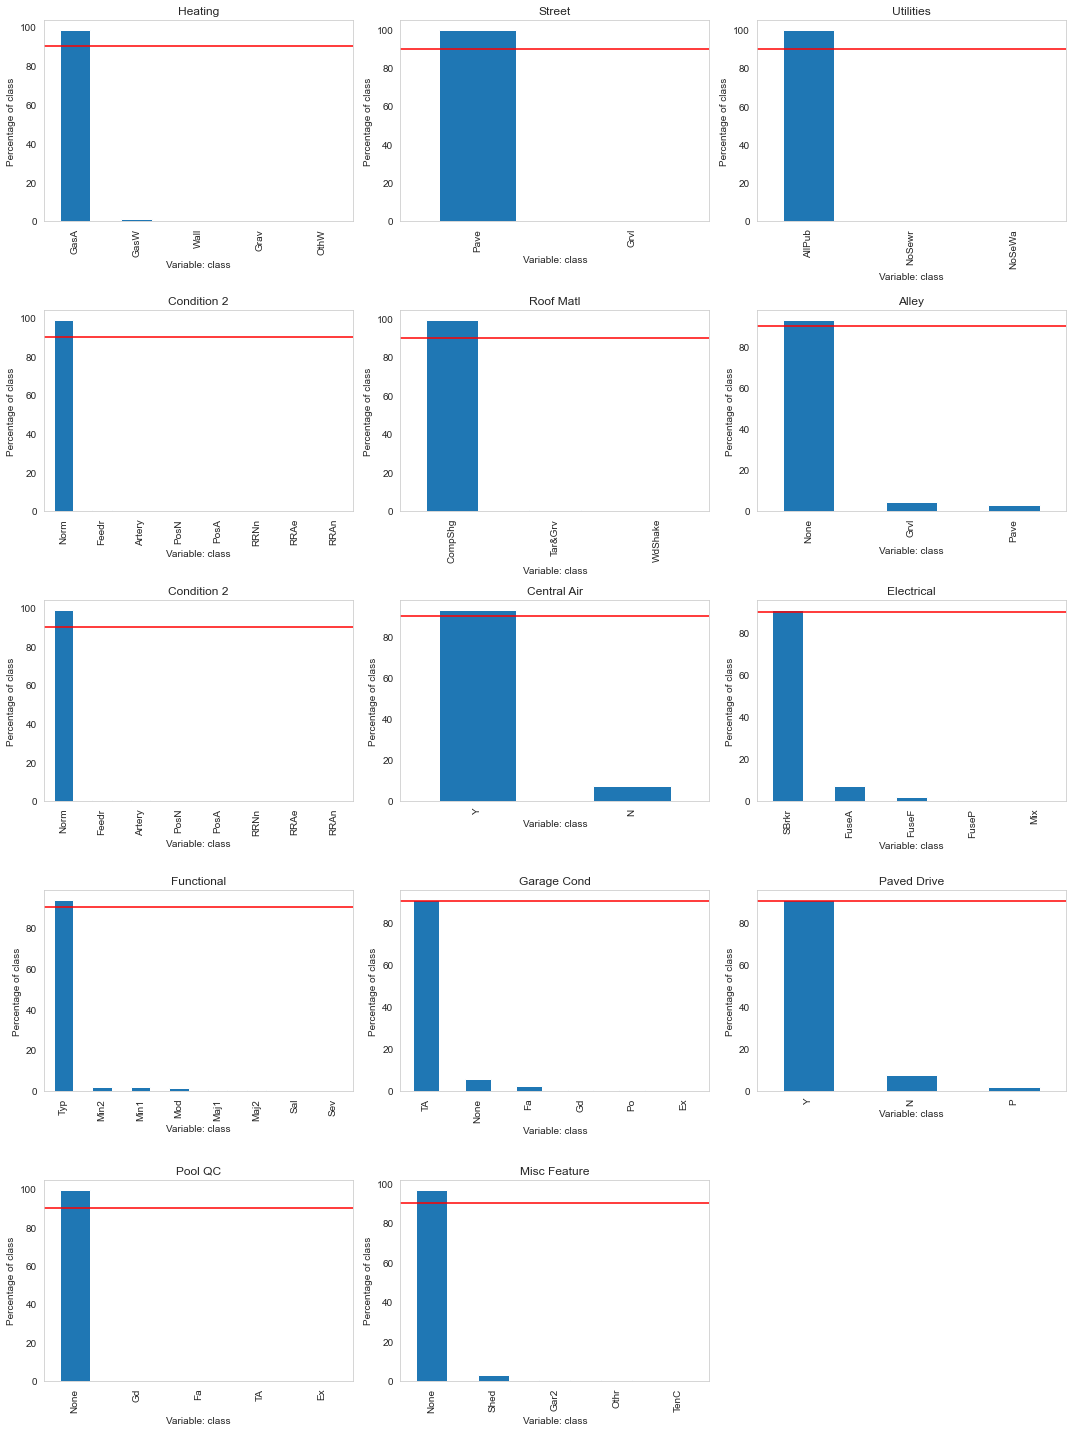

In [435]:
high_frequency_chart(high_freq, 15,20)

These categorical data has been identified to have high frequency of a single class. I have set the threshhold to be at 90%. So I will be dropping these columns. 

In [436]:
for i in high_freq:
    add_drop_cols(i)
print(col_to_drop)

['Alley', 'BsmtFin SF 2', 'Low Qual Fin SF', 'Bsmt Half Bath', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val', 'Heating', 'Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Alley', 'Condition 2', 'Central Air', 'Electrical', 'Functional', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Misc Feature']


#### Inspect Numerical Data

In [437]:
ordinal_cols = ['Overall Qual', 'Overall Cond']
temp_df = train[['Overall Qual', 'Overall Cond']]
temp_df['Overall Qual'] = temp_df['Overall Qual'].astype(str)
temp_df['Overall Cond'] = temp_df['Overall Cond'].astype(str)

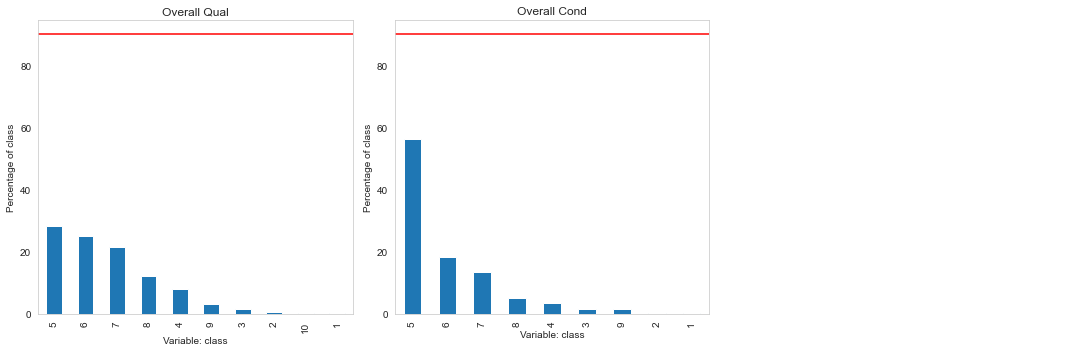

In [438]:
high_frequency_chart(temp_df, 15, 5)

There are no high frequencies data detected from the ordinal data. 

In [439]:
#Started the dataset with 2051 rows. After cleaning, 1965

### Map ordinal features

In [440]:
train = train.replace({"Alley" : {"None": 0, "Grvl" : 1, "Pave" : 2},
                       "Bsmt Cond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Bsmt Exposure" : {"None" : 0, "No" : 1, "Mn" : 2, "Av": 3, "Gd" : 4},
                       "BsmtFin Type 1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFin Type 2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "Bsmt Qual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "Exter Cond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "Exter Qual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "Fireplace Qu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "Garage Cond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Garage Qual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Garage Finish" : {"None" : 0, "Unf" : 1, "RFn" : 2, "Fin": 3},
                       "Heating QC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Kitchen Qual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Land Slope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "Lot Shape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "Paved Drive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "Pool QC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
                      "Electrical" : {"Mix" : 1, "FuseP" : 2, "FuseF" : 3, "FuseA" : 4, "SBrkr" : 5}, 
                      "Fence" : {"None" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv" : 3, "GdPrv" : 4}}
                     )

In [441]:
#### Create new features

In [442]:
#Create age of house since it was built till sold 
train['Age_Built'] = train['Yr Sold'] - train['Year Built']

#Create age remod/add of house till sold 
train['Age_Remod'] = train['Yr Sold'] - train['Year Remod/Add']
train.loc[train['Year Remod/Add'] == 0, 'Age_Remod'] = 0
train.loc[train['Yr Sold'] == train['Garage Yr Blt'], 'Age_Remod'] = 1

#Create age of garage since it was built till sold
train['Age_Garage'] = train['Yr Sold'] - train['Garage Yr Blt']
train.loc[train['Garage Yr Blt'] == 0, 'Age_Garage'] = 0
train.loc[train['Yr Sold'] == train['Garage Yr Blt'], 'Age_Garage'] = 1 

In [443]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1965.0,1.474065e+03,8.432684e+02,3.0,755.0,1477.0,2194.0,2930.0
PID,1965.0,7.154869e+08,1.886520e+08,526302030.0,528488120.0,535456050.0,907185050.0,924152030.0
MS SubClass,1965.0,5.746056e+01,4.293330e+01,20.0,20.0,50.0,70.0,190.0
Lot Frontage,1965.0,6.807749e+01,1.851757e+01,21.0,60.0,70.0,79.0,129.0
Lot Area,1965.0,9.365044e+03,3.593639e+03,1300.0,7415.0,9245.0,11103.0,26400.0
...,...,...,...,...,...,...,...,...
Yr Sold,1965.0,2.007781e+03,1.311951e+00,2006.0,2007.0,2008.0,2009.0,2010.0
SalePrice,1965.0,1.746196e+05,6.723695e+04,12789.0,128950.0,160000.0,208300.0,418000.0
Age_Built,1965.0,3.647074e+01,3.018610e+01,0.0,7.0,34.0,55.0,136.0
Age_Remod,1965.0,2.396845e+01,2.098373e+01,0.0,4.0,16.0,44.0,60.0


In [444]:
col_to_drop

['Alley',
 'BsmtFin SF 2',
 'Low Qual Fin SF',
 'Bsmt Half Bath',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Misc Val',
 'Heating',
 'Street',
 'Utilities',
 'Condition 2',
 'Roof Matl',
 'Alley',
 'Condition 2',
 'Central Air',
 'Electrical',
 'Functional',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Misc Feature']

In [445]:
train_original = train

### Exploratory Data Analysis

#### Graph Functions

In [446]:
sns.set_style("whitegrid", {'axes.grid' : False})

In [447]:
#boxplot function 
def boxplot(width, height, df, xcol, ycol, title):
    plt.figure(figsize = (width, height, ))
    sns.boxplot(data = df, y = ycol, x=xcol)
    plt.title(title)
    return plt.show()

In [448]:
#sns.set_theme(style="whitegrid")

#### Target Variable: `SalePrice`

In [449]:
train['SalePrice'].describe()

count      1965.000000
mean     174619.616794
std       67236.952464
min       12789.000000
25%      128950.000000
50%      160000.000000
75%      208300.000000
max      418000.000000
Name: SalePrice, dtype: float64

In [450]:
train['SalePrice'].median()

160000.0

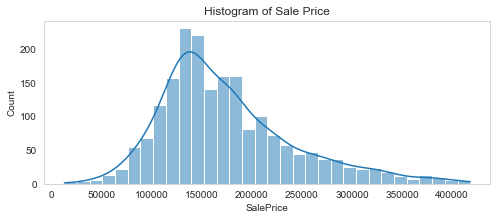

In [451]:
plt.figure(figsize=(8, 3))
sns.histplot(data=train, x="SalePrice", kde=True)
plt.title("Histogram of Sale Price");

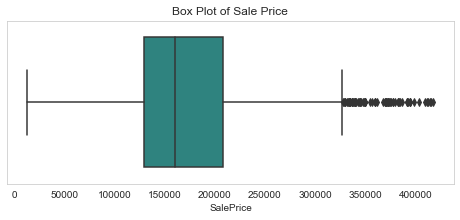

In [452]:
plt.figure(figsize=(8, 3))
sns.boxplot(data = train, x = 'SalePrice', palette = 'viridis')
plt.title("Box Plot of Sale Price");

**Comments:**
- A mean and median sale price of $174619 and $160000 respectively, indicating a positive skew, which was confirmed by both a histogram of the Sale Price, and positive kurtosis and skewness values.

#### Neighbourhood feature

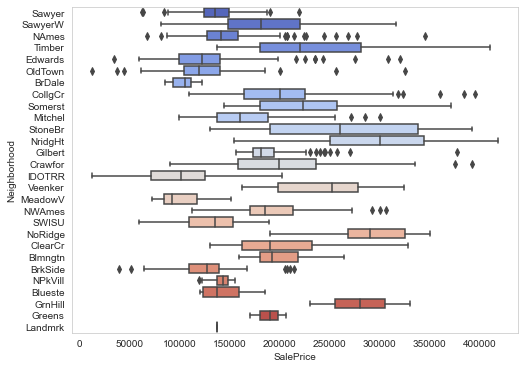

In [453]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train, x = "SalePrice", y = "Neighborhood", orient="h", palette="coolwarm");

<AxesSubplot:>

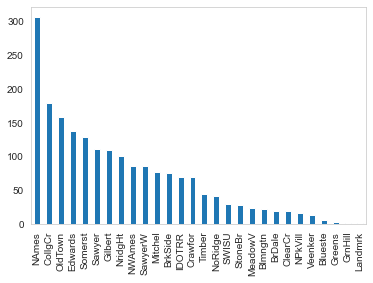

In [454]:
train['Neighborhood'].value_counts().plot(kind="bar")

**Comments:**
- There are difference in the price of house in different neighborhood
- NAmes has the highest number of transactions while GrnHill and Landmark being the least. 

#### Roof features: `Roof Style` 

<AxesSubplot:xlabel='Roof Style', ylabel='SalePrice'>

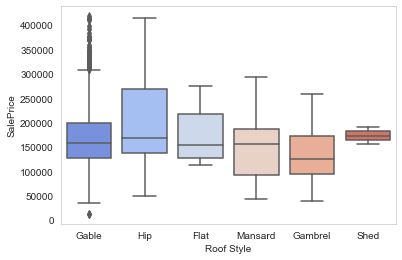

In [455]:
sns.boxplot(data = train, x = "Roof Style", y = "SalePrice", palette="coolwarm")

**Comments:**
- The mean price are relatively about the same for houses with different roof styles. However, their price range is different, eith Gable and Hip being more expensive than others. 

#### Building Type feature

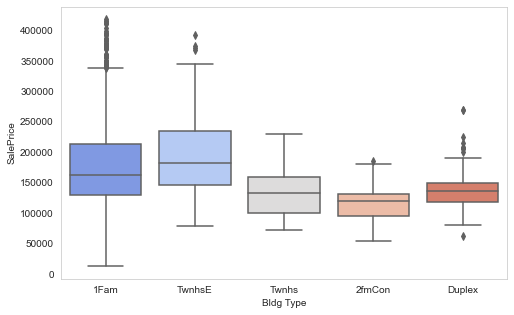

In [456]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=train, y = "SalePrice", x = "Bldg Type", palette="coolwarm");

**Comment:**
- There are different price range for houses with different building type feature. 

#### House Style feature

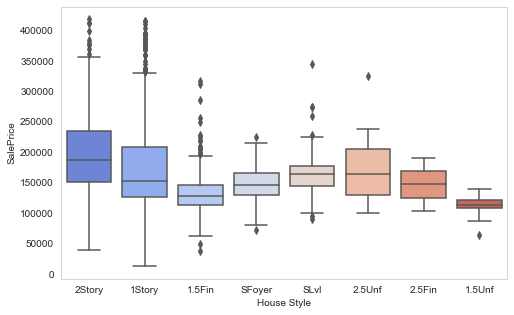

In [457]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=train, y = "SalePrice", x = "House Style", palette="coolwarm");

**Comments:**
- Price range for different House Style also differs. 

#### Gr Living Area and Overall Condition

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

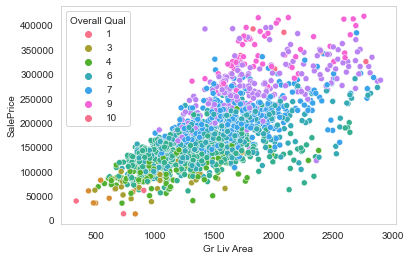

In [458]:
sns.scatterplot(data = train, y='SalePrice', x = 'Gr Liv Area', hue = 'Overall Qual', palette='husl')

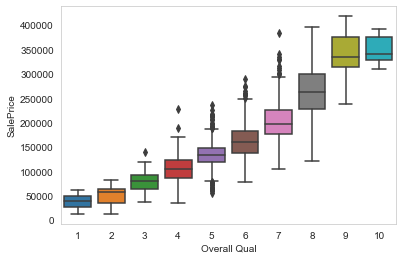

In [459]:
fig = plt.figsize = (8,5)
sns.boxplot(y='SalePrice', x='Overall Qual', data=train);

**Comments:** 
- There's correlation to SalePrice and Overall Quality; the higher the quality, the sale price is also higher. 
- Most houses are graded average

#### Yr Sold

<AxesSubplot:xlabel='Yr Sold', ylabel='SalePrice'>

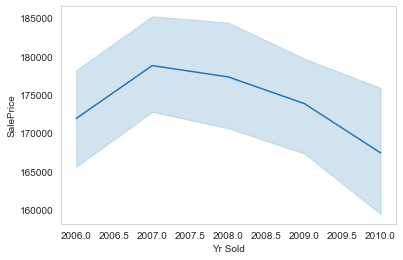

In [460]:
sns.lineplot(data = train, y = 'SalePrice', x = 'Yr Sold', estimator=np.mean)

**Comments:**
- There is a downward trend in the mean Sale Price from 2007 onwards.
- Based on outside [research](https://www.investopedia.com/investing/great-recessions-impact-housing-market/#:~:text=In%202007%2C%20the%20housing%20market,securities%20backing%20up%20subprime%20mortgages), this could be due to economic crisis in 2007 where housing prices plumetted.


#### Pool Features: `Pool QC`, `Pool Area`

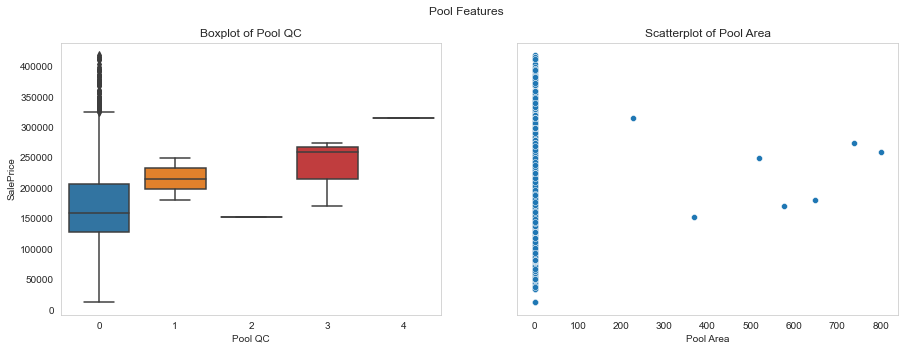

In [461]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, axes = plt.subplots(1, 2, figsize = (15,5), sharey = True)
fig.suptitle('Pool Features')

sns.boxplot(ax=axes[0], data=train, x="Pool QC", y = "SalePrice").set_title('Boxplot of Pool QC')
sns.scatterplot(ax=axes[1], data=train, x="Pool Area", y = "SalePrice").set_title('Scatterplot of Pool Area');

**Comments:**
- About 99% of the houses has no pool feature. 
- There are no clear pattern to indicate correlation with the Sale Price. 

These two features will be dropped

#### Fence feature: `Fence`

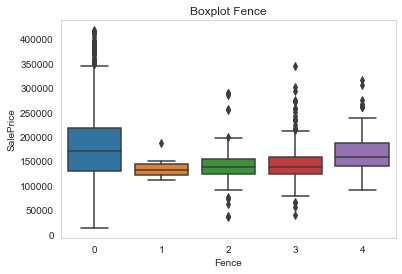

In [462]:
sns.boxplot(data=train, x="Fence", y = "SalePrice").set_title('Boxplot Fence');

**Comments:**
- About 80% of the houses has no `Fence` feature. 
- The price of the house across the classes are all within the same range

This feature will be removed

#### Garage features: 'Garage Qual','Garage Cond','Garage Yr Blt', 'Garage Cars', 'Garage Area'

In [463]:
garage = train[['Garage Yr Blt', 'SalePrice', 'Yr Sold', 'Garage Cond', 'Garage Qual']]
garage['Garage Age'] = garage['Yr Sold'] - garage['Garage Yr Blt']
garage.loc[garage['Garage Yr Blt'] == 0, 'Garage Age'] = 0

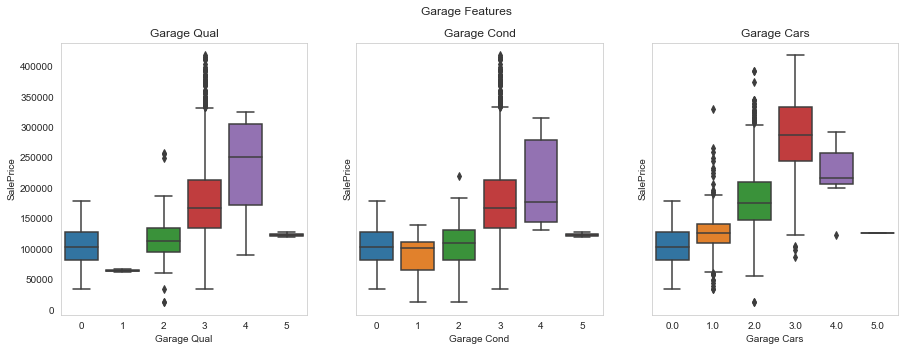

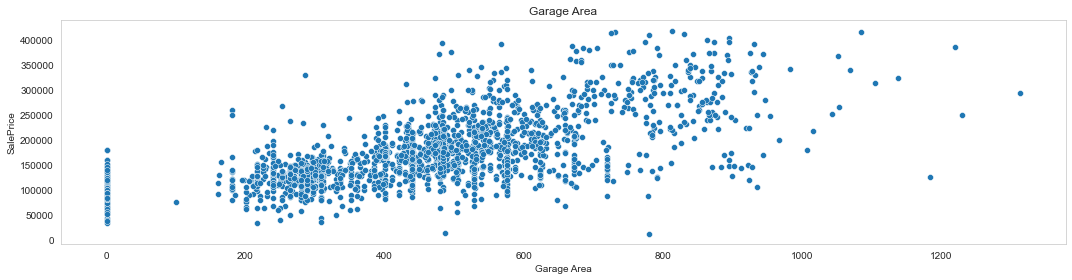

In [464]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, axes = plt.subplots(1, 3, figsize = (15,5), sharey = True)
fig.suptitle('Garage Features')

sns.boxplot(ax=axes[0], data=train, x="Garage Qual", y = "SalePrice", 
           order = [0, 1, 2, 3, 4, 5]).set_title('Garage Qual')
sns.boxplot(ax=axes[1], data=train, x="Garage Cond", y = "SalePrice",
           order = [0, 1, 2, 3, 4, 5]).set_title('Garage Cond')
sns.boxplot(ax=axes[2], data=train, x="Garage Cars", y = "SalePrice").set_title('Garage Cars')

fig, axes = plt.subplots(1, figsize = (15,4), sharey = True)
sns.scatterplot(ax=axes, data=train, x="Garage Area", y = "SalePrice").set_title('Garage Area')

plt.tight_layout();

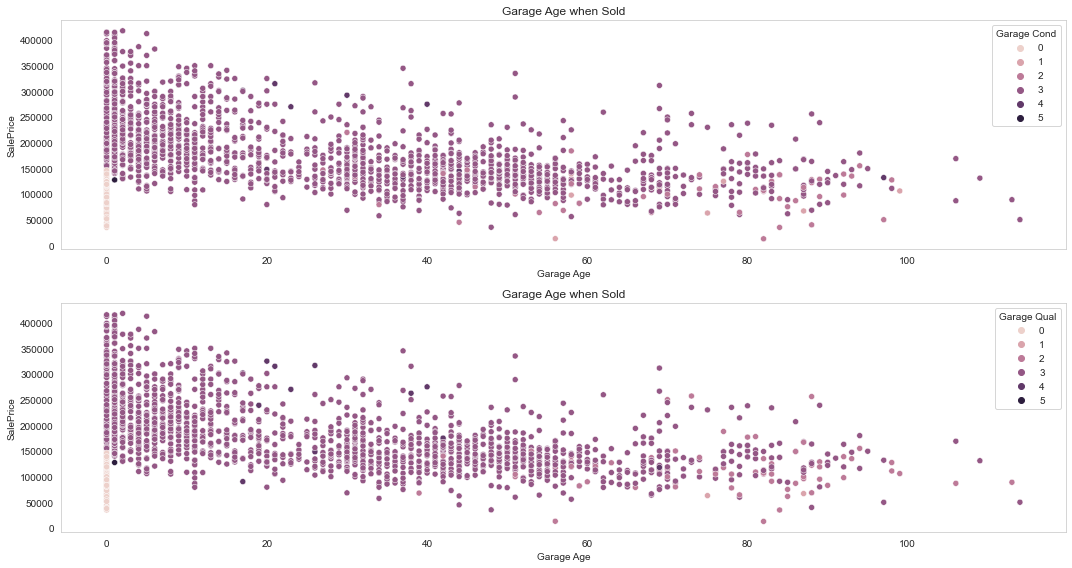

In [465]:
fig, axes = plt.subplots(2, figsize = (15,8), sharey = True)
sns.scatterplot(ax=axes[0], data=garage, x="Garage Age", y = "SalePrice", hue = 'Garage Cond').set_title('Garage Age when Sold')
sns.scatterplot(ax=axes[1], data=garage, x="Garage Age", y = "SalePrice", hue = 'Garage Qual').set_title('Garage Age when Sold')

plt.tight_layout();

**Comments:**
- `Garage Qual` & `Garage Cond`: I feel that there is not much distinction with these two categories. From the boxplot, it can be observed that Sale Price increases from Poor to Excelent in terms of quality and condition. 
- `Garage Cars` :  Sale Price increases with more cars that the house can fit but dropped more than 3 cars onwards. One reason that could contribute to the drop is that not many people would own more than 3 cars and as such, there will not be much demand for garage that could fit more than 3 cars.
- `Garage Age`: In my opinion, plotting the Age the garage was built at the time it was sold against Sale Price gives a better insight than the year it was built. From the plot, and as I have anticipated, the Sale Price of the house decreases with age. Older garages seem to be graded Fair for quality and condition. 
- I note that there are garages Age = 0 with Quality and Condition data. These are garages that were built and sold on the same year. It is clear that houses with garages Age = 0 were sold at much higher price that those with no garages at all.   

#### Basement features: `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`,`BsmtFin Type 1`, `BsmtFin Type 2`,`BsmtFin SF 1`, `BsmtFin SF 2`, `Bsmt Unf SF`, `Total Bsmt SF`

In [466]:
basement= train[['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'SalePrice']]

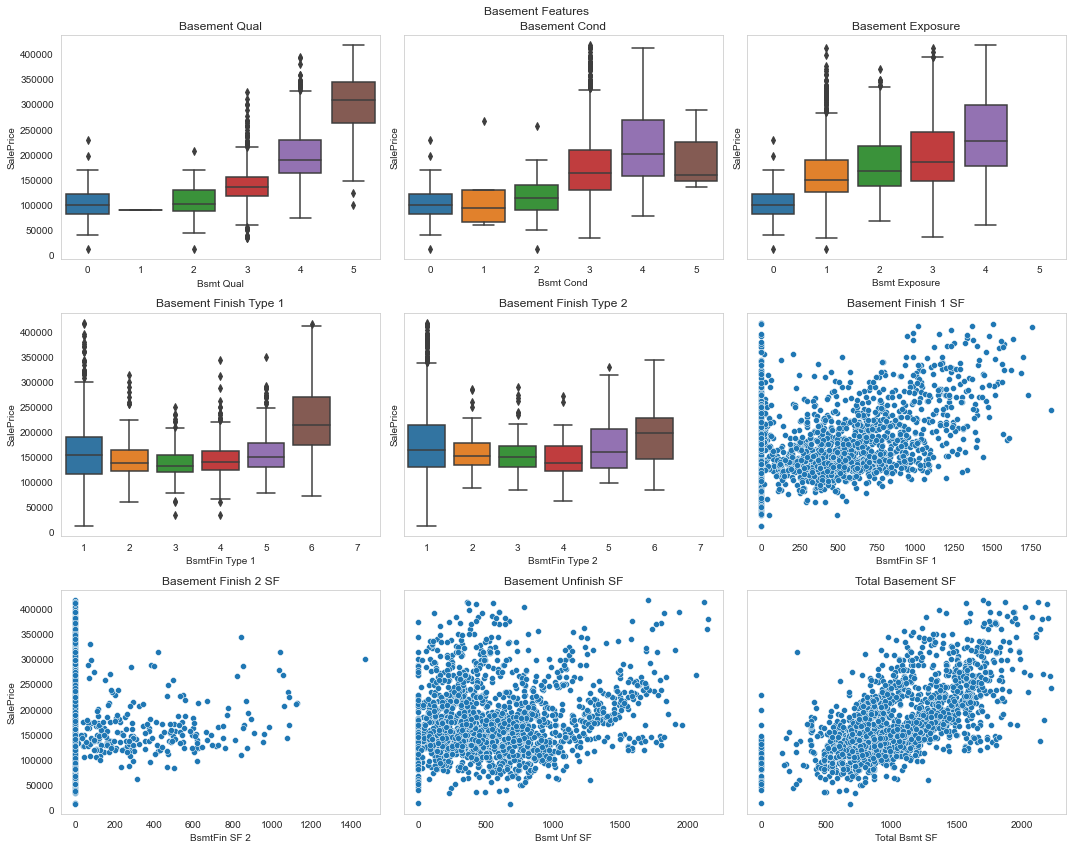

In [467]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, axes = plt.subplots(3, 3, figsize = (15,12), sharey = True)
fig.suptitle('Basement Features')

sns.boxplot(ax=axes[0,0], data=train, x="Bsmt Qual", y = "SalePrice", 
           order = [0, 1, 2, 3, 4, 5]).set_title('Basement Qual')
sns.boxplot(ax=axes[0,1], data=train, x="Bsmt Cond", y = "SalePrice",
           order = [0, 1, 2, 3, 4, 5]).set_title('Basement Cond')
sns.boxplot(ax=axes[0,2], data=train, x="Bsmt Exposure", y = "SalePrice",
           order = [0, 1, 2, 3, 4, 5]).set_title('Basement Exposure')
sns.boxplot(ax=axes[1,0], data=train, x="BsmtFin Type 1", y = "SalePrice", 
           order = [1, 2, 3,4, 5, 6, 7]).set_title('Basement Finish Type 1')
sns.boxplot(ax=axes[1,1], data=train, x="BsmtFin Type 2", y = "SalePrice",
           order = [1, 2, 3,4, 5, 6, 7]).set_title('Basement Finish Type 2')
sns.scatterplot(ax=axes[1,2], data=train, x="BsmtFin SF 1", y = "SalePrice").set_title('Basement Finish 1 SF')
sns.scatterplot(ax=axes[2,0], data=train, x="BsmtFin SF 2", y = "SalePrice").set_title('Basement Finish 2 SF')
sns.scatterplot(ax=axes[2,1], data=train, x="Bsmt Unf SF", y = "SalePrice").set_title('Basement Unfinish SF')
sns.scatterplot(ax=axes[2,2], data=train, x="Total Bsmt SF", y = "SalePrice").set_title('Total Basement SF')
plt.tight_layout();

**Comments:**
- `Bsmt Qual`& `Bsmt Cond`: Increase in Sale Price with better quality and condition. However, as for Condition, Sale Price decreases for excellent quality, which is surprising. 
- `Bsmt Exposure`: Sale Price increases with greater exposure
- Basement Finishes Type 1 & 2: The sale price is higher for houses with basement. However, in terms of finishes, the sale price range is about the same.  
- Finish SF 1 & 2, Unf SF: For finish 1, price increases with larger square feet but not as significant for Finish 2. No clear pattern can be seen for Unf SF. 
- `Total Bsmt SF`: Sale Price increases with larger square feet

Retain all features

### Kitchen features: 'Kitchen Qual', 'Kitchen AbvGr'

Text(0.5, 1.0, 'Kitchen AbvGr')

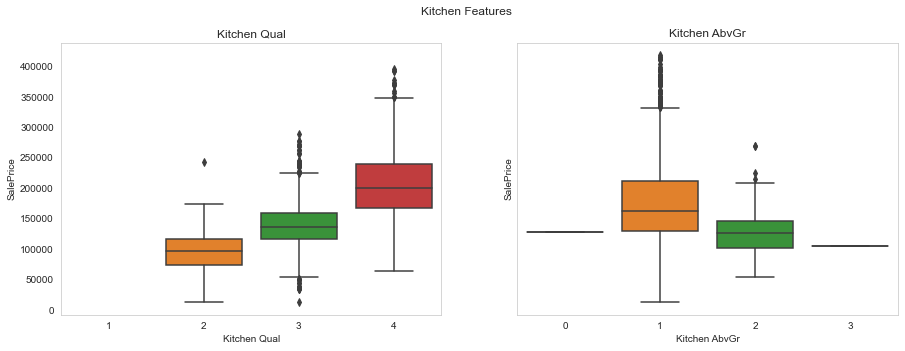

In [468]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, axes = plt.subplots(1,2, figsize = (15,5), sharey = True)
fig.suptitle('Kitchen Features')

sns.boxplot(ax=axes[0], data=train, x="Kitchen Qual", y = "SalePrice",
           order = [1, 2, 3, 4]).set_title('Kitchen Qual')
sns.boxplot(ax=axes[1], data=train, x="Kitchen AbvGr", y = "SalePrice").set_title('Kitchen AbvGr')

**Comments:**
- `Kitchen Qual`: Sale price increases with better kitchen quality
- `Kitchen AbvGr`: Houses with 1 kitchen has higher Sale Price the others

#### Heating features: 'Heating', 'Heating QC'

Text(0.5, 1.0, 'Heating Quality & Condition')

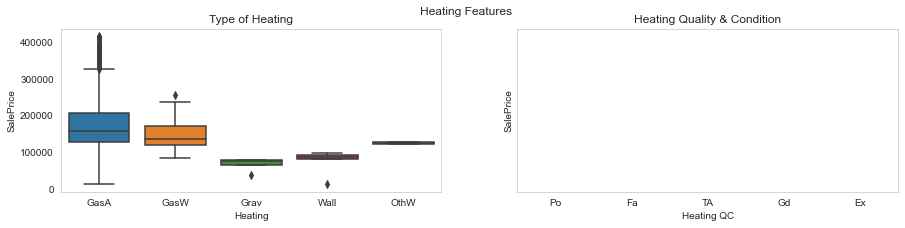

In [469]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, axes = plt.subplots(1,2, figsize = (15,3), sharey = True)
fig.suptitle('Heating Features')

sns.boxplot(ax=axes[0], data=train, x="Heating", y = "SalePrice").set_title('Type of Heating')
sns.boxplot(ax=axes[1], data=train, x="Heating QC", y = "SalePrice",
           order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']).set_title('Heating Quality & Condition')

**Comments:**
- `Heating`: Houses with GasA type of heating have higher Sale price compares to other types.
- `Heating QC`: Sale prices increases with better quality and condition of heating

In [470]:
temp_df = train[['Gr Liv Area', 'Total Bsmt SF', 'Low Qual Fin SF', 'Neighborhood', 'SalePrice']]
temp_df['Total Living SF'] = temp_df['Gr Liv Area'] + temp_df['Total Bsmt SF']
temp_df.groupby('Neighborhood', as_index=True)['SalePrice'].mean()  / temp_df.groupby('Neighborhood', as_index=True)['Total Living SF'].mean()

Neighborhood
Blmngtn     72.808154
Blueste     73.440014
BrDale      64.317058
BrkSide     62.394798
ClearCr     69.889024
CollgCr     75.774871
Crawfor     75.457039
Edwards     61.018787
Gilbert     76.278210
Greens      76.943991
GrnHill    130.262852
IDOTRR      52.954501
Landmrk     70.256410
MeadowV     57.469301
Mitchel     68.808968
NAmes       62.614038
NPkVill     64.258422
NWAmes      65.893752
NoRidge     80.279460
NridgHt     87.851429
OldTown     55.498380
SWISU       57.562469
Sawyer      65.442071
SawyerW     71.270550
Somerst     82.131211
StoneBr     84.733681
Timber      79.396914
Veenker     79.537645
dtype: float64

<AxesSubplot:xlabel='Functional', ylabel='count'>

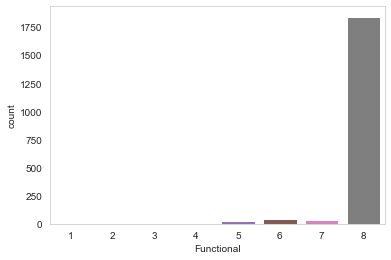

In [471]:
sns.countplot(data = train, x = 'Functional')

In [472]:
#remove duplicates from columns to drop list
col_to_drop = list(dict.fromkeys(col_to_drop))
print(col_to_drop)

['Alley', 'BsmtFin SF 2', 'Low Qual Fin SF', 'Bsmt Half Bath', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val', 'Heating', 'Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Central Air', 'Electrical', 'Functional', 'Garage Cond', 'Paved Drive']


In [473]:
train.shape

(1965, 84)

In [474]:
drop_columns(train, col_to_drop)

In [475]:
train.shape

(1965, 62)

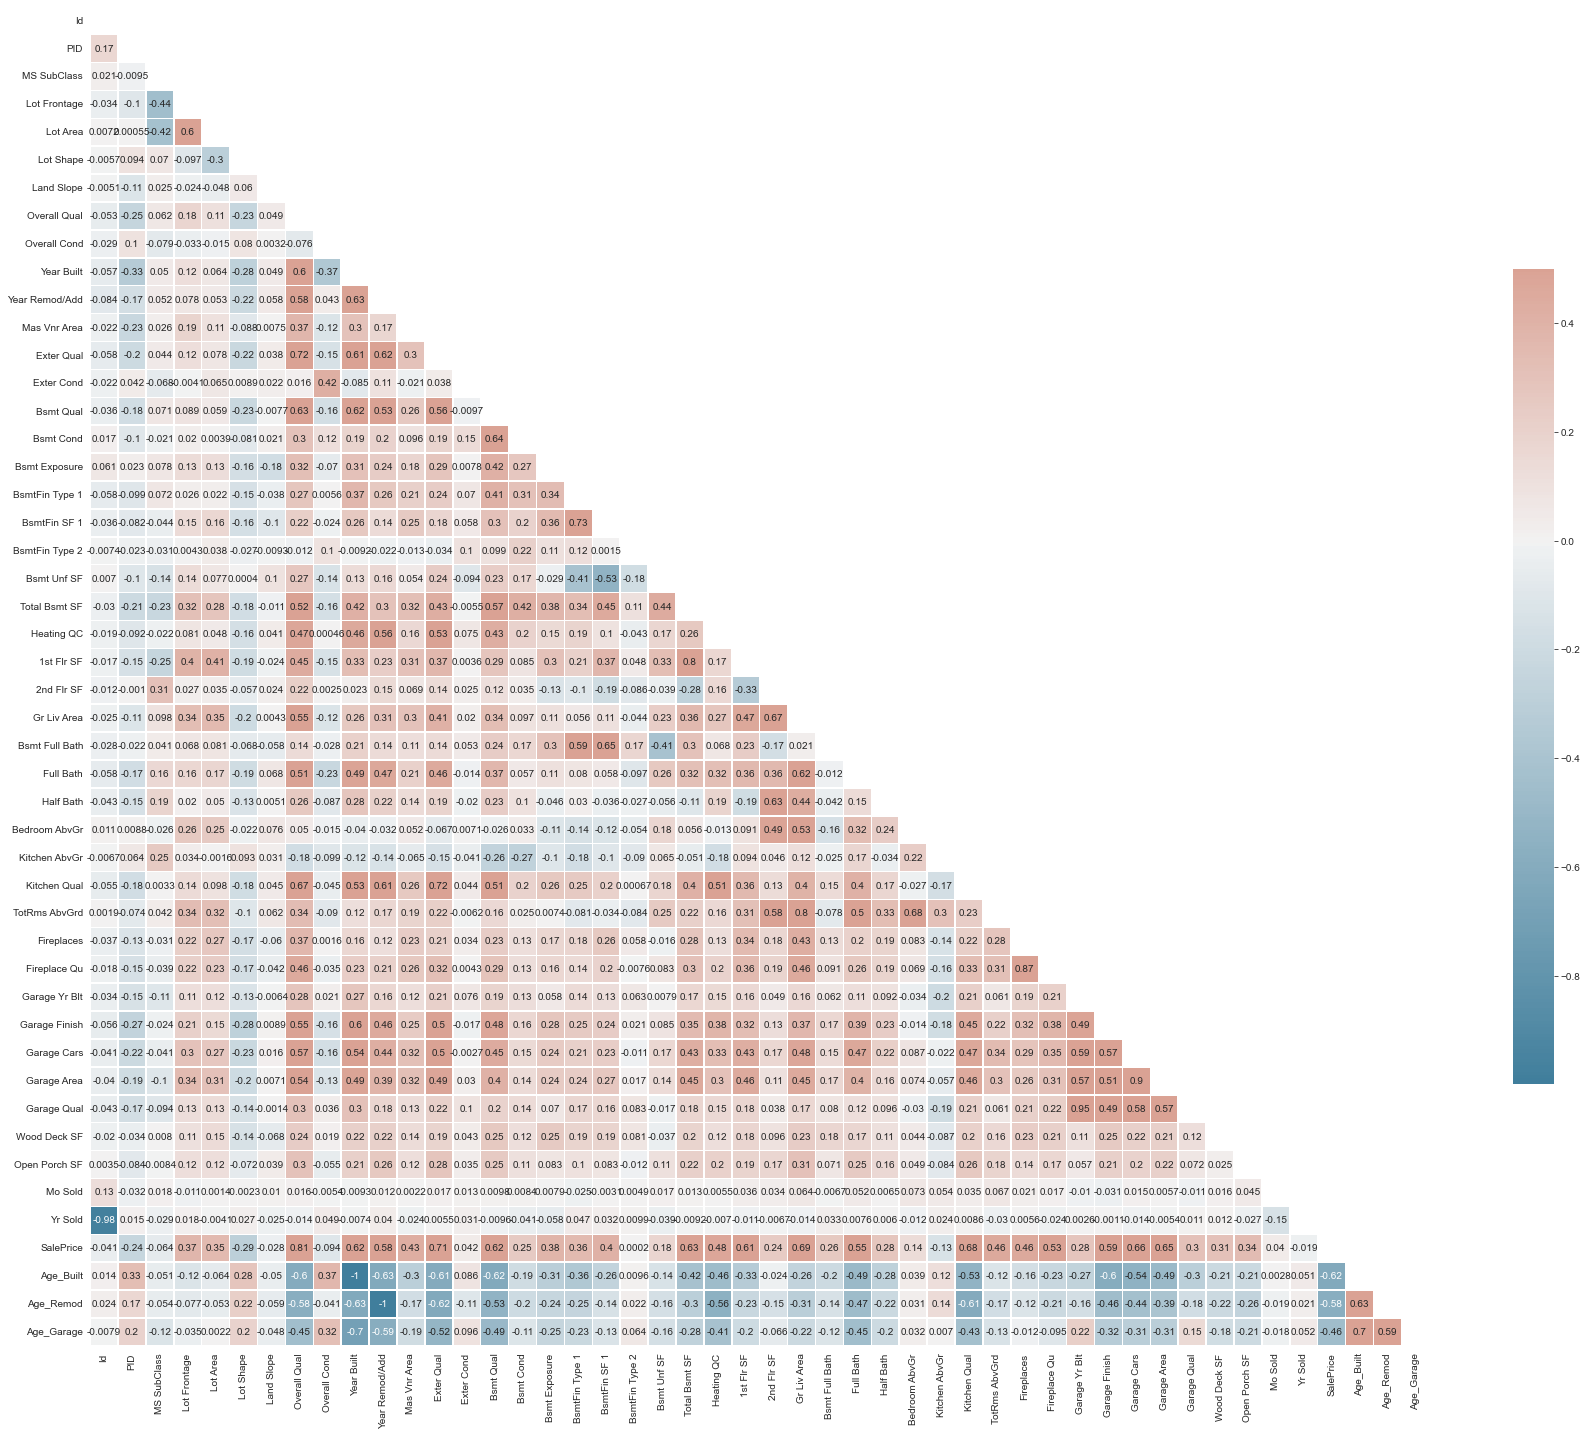

In [476]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(train.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train.corr(), mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, annot = True);

**Comments:**
- Features that are related to age and year have high negative correlation with SalePrice. This is so because older houses are cheaper as compared to the younger properties. As such, as a property age increases, price of property decreases. 
- Age features have near correlation of 1 or -1 which is expected. I will drop one of the feature that are highly correlated to one another to avoid multicollinearity.
- For example :
    -`Age_Garage` with `Year Built`(-0.7),`Year Removed\Add`(-0.59), `Age_Built`(0.7) and `Age_Remod`(0.59)
    -`Age_Remod` with `Year Built`(-0.63), `Year Removed\Add`(-1), `Age_Built`(0.63)

In [477]:
to_drop = ['Yr Sold', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt']
for i in to_drop:
    add_drop_cols(i)
print(col_to_drop)

['Alley', 'BsmtFin SF 2', 'Low Qual Fin SF', 'Bsmt Half Bath', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val', 'Heating', 'Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Central Air', 'Electrical', 'Functional', 'Garage Cond', 'Paved Drive', 'Yr Sold', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt']


In [478]:
train.shape

(1965, 62)

In [479]:
drop_columns(train, to_drop)

In [480]:
train.shape

(1965, 58)

In [481]:
train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False).head()

,SalePrice
SalePrice,1.000000
Overall Qual,0.811805
Exter Qual,0.712208
Gr Liv Area,0.694934
Kitchen Qual,0.684557


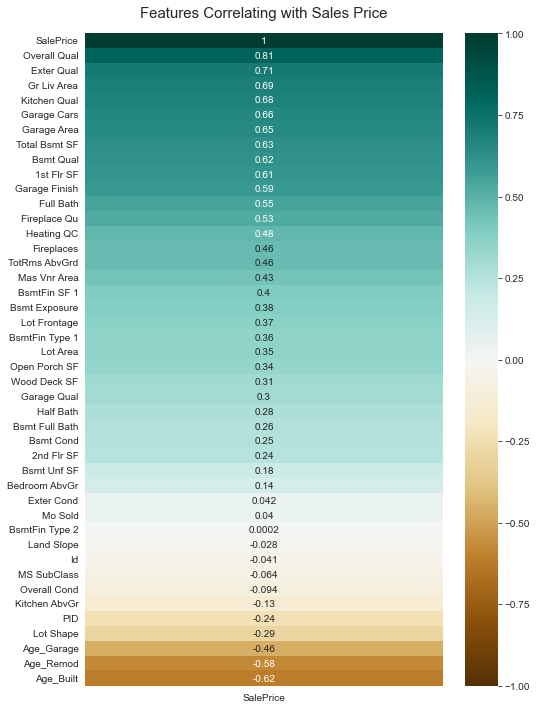

In [482]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':15}, pad=16);

**Comments:**
- I will drop columns that have low correlation with SalePrice. However, I take precaution as there may be features that are closely related to purchase of a house. For example, `Kitchen AbvGr`, as a buyer, knowing there is at least a kitchen in the property is important. So I will keep for now.  
- For features that are highly correlated with Sale Price, it is no surprise as these are features that a home buyer would look out for when purchasing a house. 

In [483]:
to_drop = ['Lot Shape', 'PID', 'Overall Cond', 'MS SubClass', 'Land Slope',
        'BsmtFin Type 2', 'Mo Sold', 'Exter Cond', 'Bedroom AbvGr', 'Bsmt Unf SF',
        '2nd Flr SF', 'Bsmt Cond', 'Bsmt Full Bath', 'Half Bath', 'Garage Qual', 'Wood Deck SF', 'Open Porch SF', 'Lot Area',
       'Mas Vnr Area','BsmtFin SF 1','Bsmt Exposure','Lot Frontage','BsmtFin Type 1']

for i in to_drop:
    add_drop_cols(i)
print(col_to_drop)

['Alley', 'BsmtFin SF 2', 'Low Qual Fin SF', 'Bsmt Half Bath', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val', 'Heating', 'Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Central Air', 'Electrical', 'Functional', 'Garage Cond', 'Paved Drive', 'Yr Sold', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Lot Shape', 'PID', 'Overall Cond', 'MS SubClass', 'Land Slope', 'BsmtFin Type 2', 'Mo Sold', 'Exter Cond', 'Bedroom AbvGr', 'Bsmt Unf SF', '2nd Flr SF', 'Bsmt Cond', 'Bsmt Full Bath', 'Half Bath', 'Garage Qual', 'Wood Deck SF', 'Open Porch SF', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'Bsmt Exposure', 'Lot Frontage', 'BsmtFin Type 1']


In [484]:
train.shape

(1965, 58)

In [485]:
drop_columns(train, to_drop)

In [486]:
train.shape

(1965, 35)

In [487]:
train.head()

,Id,MS Zoning,Land Contour,Lot Config,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Foundation,Bsmt Qual,Total Bsmt SF,Heating QC,1st Flr SF,Gr Liv Area,Full Bath,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Sale Type,SalePrice,Age_Built,Age_Remod,Age_Garage
0,109,RL,Lvl,CulDSac,Sawyer,RRAe,1Fam,2Story,6,Gable,HdBoard,Plywood,BrkFace,4,CBlock,3,725.0,5,725,1479,2,1,4,6,0,0,Attchd,2,2.0,475.0,WD,130500,34,5,34.0
1,544,RL,Lvl,CulDSac,SawyerW,Norm,1Fam,2Story,7,Gable,VinylSd,VinylSd,BrkFace,4,PConc,4,913.0,5,913,2122,2,1,4,8,1,3,Attchd,2,2.0,559.0,WD,220000,13,12,12.0
2,153,RL,Lvl,Inside,NAmes,Norm,1Fam,1Story,5,Gable,VinylSd,VinylSd,None,3,CBlock,3,1057.0,3,1057,1057,1,1,4,5,0,0,Detchd,1,1.0,246.0,WD,109000,57,3,57.0
3,318,RL,Lvl,Inside,Timber,Norm,1Fam,2Story,5,Gable,VinylSd,VinylSd,None,3,PConc,4,384.0,4,744,1444,2,1,3,7,0,0,BuiltIn,3,2.0,400.0,WD,174000,4,3,3.0
4,255,RL,Lvl,Inside,SawyerW,Norm,1Fam,1.5Fin,6,Gable,Wd Sdng,Plywood,None,3,PConc,2,676.0,3,831,1445,2,1,3,6,0,0,Detchd,1,2.0,484.0,WD,138500,110,17,53.0


In [488]:
#remove duplicates from columns to drop list
col_to_drop = list(dict.fromkeys(col_to_drop))
print(col_to_drop)

['Alley', 'BsmtFin SF 2', 'Low Qual Fin SF', 'Bsmt Half Bath', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val', 'Heating', 'Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Central Air', 'Electrical', 'Functional', 'Garage Cond', 'Paved Drive', 'Yr Sold', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Lot Shape', 'PID', 'Overall Cond', 'MS SubClass', 'Land Slope', 'BsmtFin Type 2', 'Mo Sold', 'Exter Cond', 'Bedroom AbvGr', 'Bsmt Unf SF', '2nd Flr SF', 'Bsmt Cond', 'Bsmt Full Bath', 'Half Bath', 'Garage Qual', 'Wood Deck SF', 'Open Porch SF', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'Bsmt Exposure', 'Lot Frontage', 'BsmtFin Type 1']


In [489]:
col_to_drop

['Alley',
 'BsmtFin SF 2',
 'Low Qual Fin SF',
 'Bsmt Half Bath',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Misc Val',
 'Heating',
 'Street',
 'Utilities',
 'Condition 2',
 'Roof Matl',
 'Central Air',
 'Electrical',
 'Functional',
 'Garage Cond',
 'Paved Drive',
 'Yr Sold',
 'Year Built',
 'Year Remod/Add',
 'Garage Yr Blt',
 'Lot Shape',
 'PID',
 'Overall Cond',
 'MS SubClass',
 'Land Slope',
 'BsmtFin Type 2',
 'Mo Sold',
 'Exter Cond',
 'Bedroom AbvGr',
 'Bsmt Unf SF',
 '2nd Flr SF',
 'Bsmt Cond',
 'Bsmt Full Bath',
 'Half Bath',
 'Garage Qual',
 'Wood Deck SF',
 'Open Porch SF',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'Bsmt Exposure',
 'Lot Frontage',
 'BsmtFin Type 1']

In [490]:
train.shape 

(1965, 35)

In [491]:
original_rows = 2051
latest_rows = 1965
diff = original_rows - latest_rows
percentage_diff = round((diff/original_rows)*100,2)
print(f'We started out with {original_rows}. During data cleaning, we have dropped {diff}, which is {percentage_diff}% of our data.')

We started out with 2051. During data cleaning, we have dropped 86, which is 4.19% of our data.


In [492]:
# Saving the cleaned dataset

train.to_csv("./datasets/train_clean.csv", index=False)